# **Business Problem**

**An e-commerce company wants to predict whether a customer will purchase a product based on their behavior and demographics.**

**Import Dependencies**

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


**Data Pre-processing**

In [78]:
# load Dataset
customers_data=pd.read_csv("/content/Social_Network_Ads.csv")
customers_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [79]:
# getting the rows and columns of dataset
customers_data.shape

(400, 5)

In [80]:
# Getting The datatypes of each column
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [81]:
# Check for null values
customers_data.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [82]:
# Check for duplicate values
customers_data.duplicated().sum()

np.int64(0)

**EDA**

In [83]:
# count the values of Purchased column
customers_data['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


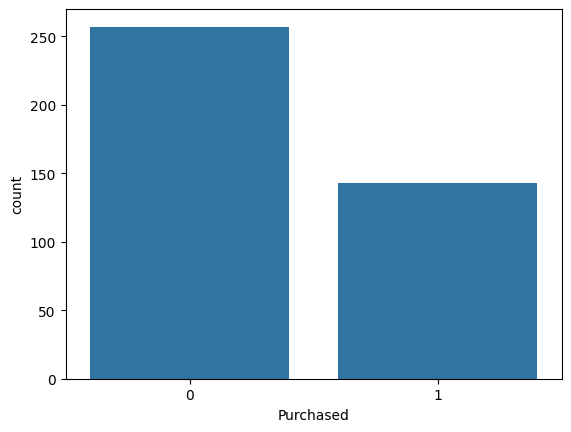

In [84]:
sns.countplot(x='Purchased',data=customers_data)
plt.show()

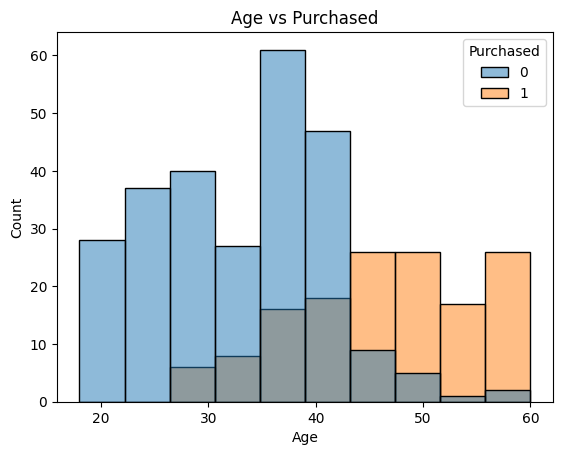

In [85]:
sns.histplot(x="Age",data=customers_data,hue='Purchased')
plt.title('Age vs Purchased')
plt.show()

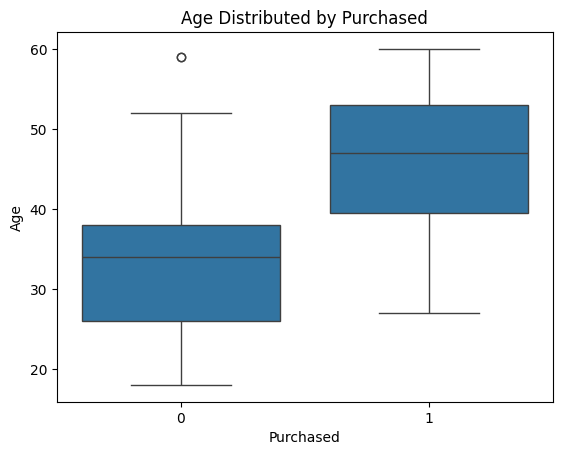

In [86]:
sns.boxplot(x='Purchased',y='Age',data=customers_data)
plt.title('Age Distributed by Purchased')
plt.show()

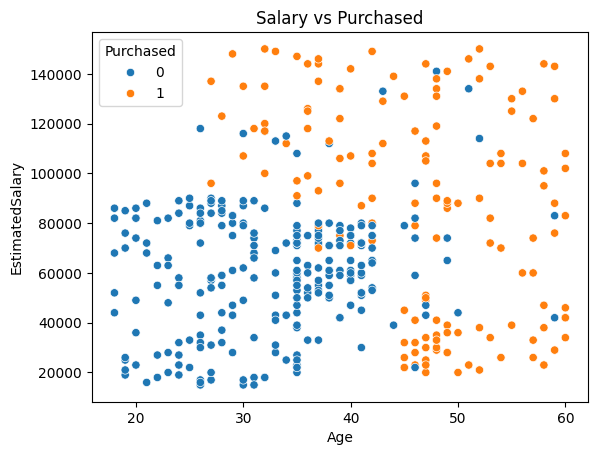

In [87]:
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=customers_data)
plt.title("Salary vs Purchased")
plt.show()

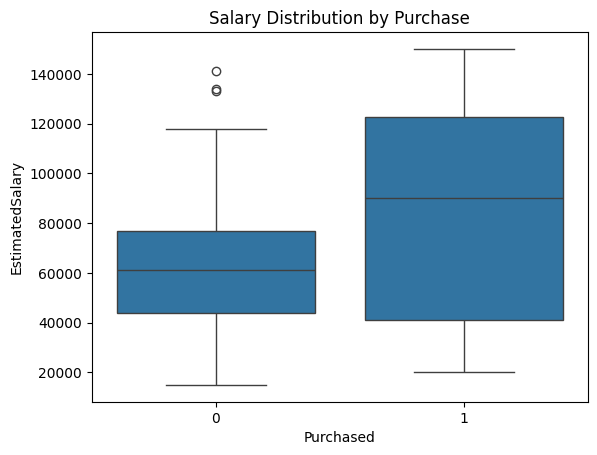

In [88]:
sns.boxplot(x='Purchased', y='EstimatedSalary', data=customers_data)
plt.title("Salary Distribution by Purchase")
plt.show()

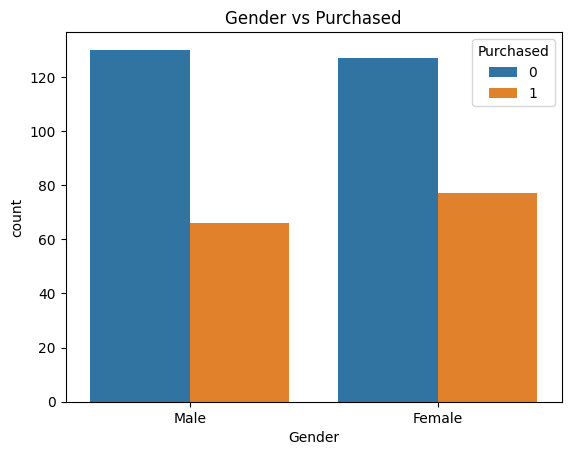

In [89]:
sns.countplot(x='Gender', hue='Purchased', data=customers_data)
plt.title("Gender vs Purchased")
plt.show()

In [90]:
# Gender Encoding
le=preprocessing.LabelEncoder()
customers_data['Gender']=le.fit_transform(customers_data['Gender'])

In [91]:
x=customers_data.drop(columns=['Purchased','User ID'],axis=1)
y=customers_data['Purchased']

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30,stratify=y)

In [93]:
x.shape,x_train.shape,x_test.shape

((400, 3), (320, 3), (80, 3))

In [94]:
# Scaling
scaler=preprocessing.StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

**Model Training**

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models={
    'Logistic Regression':LogisticRegression(max_iter=500),
    'knn':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(random_state=30),
    'Random Forest':RandomForestClassifier(random_state=30),
    'XGB':XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=30)

}

In [96]:
# train The models
for name,model in models.items():
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(f"Model Name : {name}")
  print("Accuracy :",metrics.accuracy_score(y_test,y_pred))
  print("Precision Score :",metrics.precision_score(y_test,y_pred))
  print("Recall Score :",metrics.recall_score(y_test,y_pred))
  print("F1 Score :",metrics.f1_score(y_test,y_pred))
  print("Confusion Matrix :\n",metrics.confusion_matrix(y_test,y_pred))




Model Name : Logistic Regression
Accuracy : 0.85
Precision Score : 0.8148148148148148
Recall Score : 0.7586206896551724
F1 Score : 0.7857142857142857
Confusion Matrix :
 [[46  5]
 [ 7 22]]
Model Name : knn
Accuracy : 0.925
Precision Score : 0.896551724137931
Recall Score : 0.896551724137931
F1 Score : 0.896551724137931
Confusion Matrix :
 [[48  3]
 [ 3 26]]
Model Name : Decision Tree
Accuracy : 0.85
Precision Score : 0.7741935483870968
Recall Score : 0.8275862068965517
F1 Score : 0.8
Confusion Matrix :
 [[44  7]
 [ 5 24]]
Model Name : Random Forest
Accuracy : 0.9
Precision Score : 0.8620689655172413
Recall Score : 0.8620689655172413
F1 Score : 0.8620689655172413
Confusion Matrix :
 [[47  4]
 [ 4 25]]
Model Name : XGB
Accuracy : 0.8625
Precision Score : 0.8
Recall Score : 0.8275862068965517
F1 Score : 0.8135593220338984
Confusion Matrix :
 [[45  6]
 [ 5 24]]


In [97]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))
print("Precision Score :",metrics.precision_score(y_test,y_pred))
print("Recall Score :",metrics.recall_score(y_test,y_pred))
print("F1 Score :",metrics.f1_score(y_test,y_pred))

Accuracy : 0.925
Precision Score : 0.896551724137931
Recall Score : 0.896551724137931
F1 Score : 0.896551724137931


In [126]:
# makeing The prediction system
input_data=[1,58,22000]
input_data_as_numpy_array=np.asarray(input_data).reshape(1,-1)
input_scaled = scaler.transform(input_data_as_numpy_array)
prediction=knn.predict(input_scaled)
print(prediction)
if prediction[0]==0:
  print("The customer will not purchase the product")
else:
  print("The customer will purchase the product")

[1]
The customer will purchase the product


In [100]:
# import joblib

# joblib.dump(model, "model.pkl")
# joblib.dump(scaler, "scaler.pkl")